<a href="https://colab.research.google.com/github/cmannnn/mnist/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification

In [1]:
#imports
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_val_predict

from sklearn.multiclass import OneVsOneClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Reading data

In [2]:
# reading in MNIST datasets
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv')
mnist_test = pd.read_csv('sample_data/mnist_test.csv')

In [3]:
# checking training data shape
mnist_train.shape

(19999, 785)

In [4]:
# checking testing data shape
mnist_test.shape

(9999, 785)

# Splitting train data

In [5]:
# splitting train data into features and targets
mnist_train_y = mnist_train['6']
mnist_train_X = mnist_train.drop(['6'], axis=1)

In [6]:
# checking train y shape
mnist_train_y.shape

(19999,)

In [7]:
# checking train X shape
mnist_train_X.shape

(19999, 784)

# Splitting test data

In [8]:
# splitting test data into features and targets
mnist_test_y = mnist_test['7']
mnist_test_X = mnist_test.drop(['7'], axis=1)

In [9]:
# checking test y shape
mnist_test_y.shape

(9999,)

In [10]:
# checking test X shape
mnist_test_X.shape

(9999, 784)

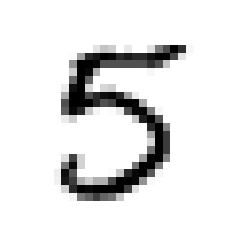

In [11]:
# displaying the image
some_digit = np.array(mnist_train_X[:1])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [12]:
# checking target value
mnist_train_y[0]

5

# Training a binary classifier

In [13]:
# creating binary data set for a '#5 ditector' as binary classifer test
mnist_y_train_5 = (mnist_train_y == 5)
mnist_y_test_5 = (mnist_test_y ==5)

In [14]:
mnist_y_train_5

0         True
1        False
2        False
3         True
4        False
         ...  
19994    False
19995    False
19996    False
19997    False
19998     True
Name: 6, Length: 19999, dtype: bool

In [15]:
mnist_y_test_5

0       False
1       False
2       False
3       False
4       False
        ...  
9994    False
9995    False
9996    False
9997     True
9998    False
Name: 7, Length: 9999, dtype: bool

In [16]:
# Stochastic Gradient Discent
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(mnist_train_X, mnist_y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [17]:
# predicting if data == 5
sgd_clf.predict(some_digit)

array([ True])

Measuring score with cross-validation folds

In [18]:
# initiating cross folds
cross_val_score(sgd_clf, mnist_train_X, mnist_y_train_5, cv=3, scoring='accuracy')

array([0.96130193, 0.95829583, 0.96144614])

Measuring score with confusion matrix

In [19]:
# initiating cross val predictor
y_train_pred = cross_val_predict(sgd_clf, mnist_train_X, mnist_y_train_5, cv=3) 

In [20]:
# measuring confusion matrix
confusion_matrix(mnist_y_train_5, y_train_pred)

array([[17952,   286],
       [  507,  1254]])

Measuring precision and recall

In [21]:
# precision
precision_score(mnist_y_train_5, y_train_pred)

0.8142857142857143

In [22]:
# recall
recall_score(mnist_y_train_5, y_train_pred)

0.7120954003407155

Measuring f1 score

In [23]:
# measuring f1
f1_score(mnist_y_train_5, y_train_pred)

0.7597697667373522

Determining precision recall tradeoff

In [24]:
# using cross_val_predict part 2
y_scores = cross_val_predict(sgd_clf, mnist_train_X, mnist_y_train_5, cv=3, method='decision_function')

In [25]:
# creating precision recall curve
precisions, recalls, thresholds = precision_recall_curve(mnist_y_train_5, y_scores)

In [26]:
# calculating 90% precision and 90% accuracy
recall_90_precision= recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

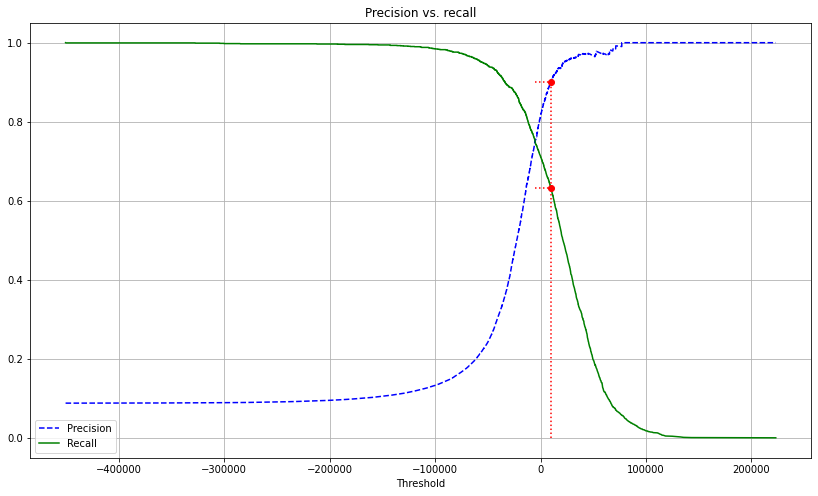

In [27]:
# plotting 90% precision 90% recall ROC graph
fig, ax = plt.subplots(figsize=[14,8])

plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], 'r:')
plt.plot([-5000, threshold_90_precision], [0.9, 0.9], 'r:')
plt.plot([-5000, threshold_90_precision], [recall_90_precision, recall_90_precision], 'r:')
plt.plot([threshold_90_precision], [0.9], 'ro')
plt.plot([threshold_90_precision], [recall_90_precision], 'ro')

plt.grid(True)
plt.xlabel('Threshold')
plt.title('Precision vs. recall')
plt.legend()
plt.show()

In [28]:
# aiming for 90% precision with argmax
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [29]:
# checking predictions with 90& precision
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [30]:
# checking predictions precision score
precision_score(mnist_y_train_5, y_train_pred_90)

0.9005658852061439

In [31]:
# checing precitions recall score
recall_score(mnist_y_train_5, y_train_pred_90)

0.6325951164111301

ROC curve

In [32]:
# calculating false positive, true positive, and thresholds
fpr, tpr, thresholds = roc_curve(mnist_y_train_5, y_scores)

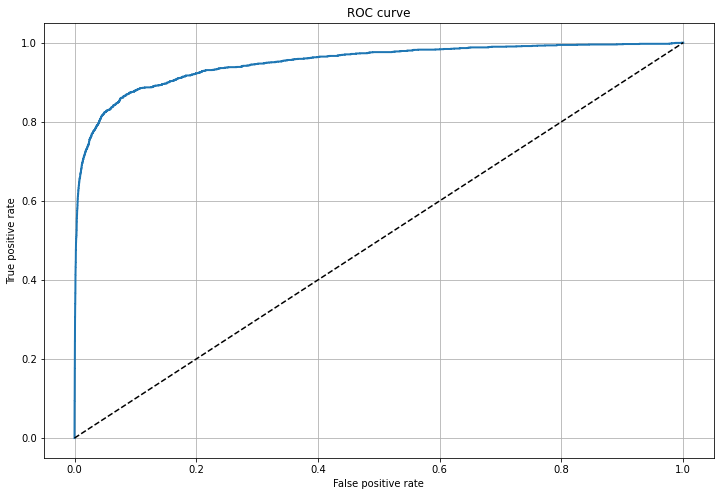

In [33]:
# plotting the ROC curve
fig, ax = plt.subplots(figsize=[12, 8])
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0, 1], [0, 1], 'k--')

plt.grid()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [34]:
# calculating roc auc score
roc_auc_score(mnist_y_train_5, y_scores)

0.9498462782370448

Comparing/contrasting SGDCLassifier and RandomForestClassifier's ROC and ROC AUC curve

In [35]:
# initiating RandomForest 
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, mnist_train_X, mnist_y_train_5, cv=3, method='predict_proba')

In [36]:
# getting random forest scores instead of probabilities
y_scores_forest = y_probas_forest[:, 1]

In [37]:
# setting up the ROC curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(mnist_y_train_5, y_scores_forest)

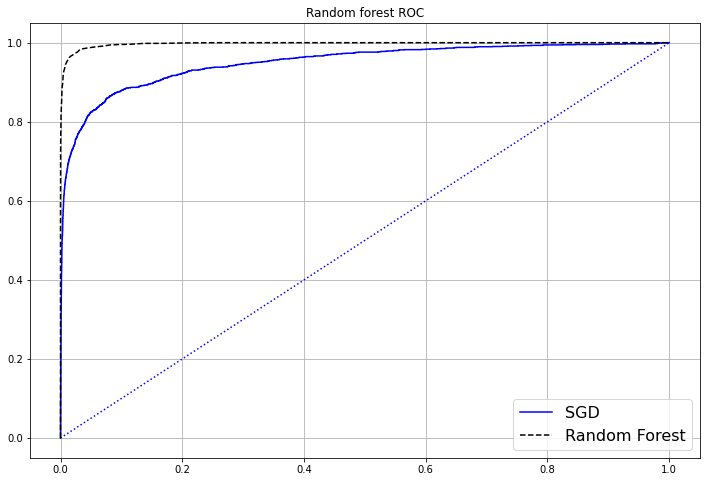

In [38]:
# plotting random forest ROC curve
ax, fig = plt.subplots(figsize=[12, 8])
plt.plot(fpr, tpr, 'b', label='SGD')
plt.plot([0, 1], [0, 1], 'b:')
plt.plot(fpr_forest, tpr_forest, 'k--', label='Random Forest')

plt.title('Random forest ROC')
plt.grid(True)
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [39]:
# random forest ROC score
roc_auc_score(mnist_y_train_5, y_scores_forest)

0.9974342965642184

# Multiclass Classification

In [40]:
# SGDClassifier One vs One (OvO) multi binary classifier
sgd_clf.fit(mnist_train_X, mnist_train_y)
sgd_clf.predict(mnist_train_X[:1])

array([5])

In [41]:
# checking 10 different SGDClassifier classifiers
some_digit_scores = sgd_clf.decision_function(mnist_train_X[:1])
some_digit_scores

array([[-106730.03734187, -110987.0941131 , -110777.07852993,
          -8859.84040304,  -56937.37503956,   27310.55618559,
        -105733.20764502, -114404.4624525 ,  -13908.45774533,
         -43748.52285775]])

In [42]:
# which SGDClassifier has the hightest confidence?
np.argmax(some_digit_scores)

5

In [43]:
# listing all the classifiers
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
# the 5th classifier !
sgd_clf.classes_[5]

5

In [45]:
# specifying OvO SGDClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(mnist_train_X, mnist_train_y)
ovo_clf.predict(mnist_train_X[:1])

array([5])

In [46]:
# how many estimaters were used?
len(ovo_clf.estimators_)

45

In [47]:
# specifyig OvO RandomForestClassifier
forest_clf.fit(mnist_train_X, mnist_train_y)
forest_clf.predict(mnist_train_X[:1])

array([5])

In [48]:
# OvO RandomForestClassifier class confidences
forest_clf.predict_proba(mnist_train_X[:1])

array([[0.  , 0.  , 0.  , 0.03, 0.  , 0.96, 0.  , 0.  , 0.01, 0.  ]])

In [49]:
# evaluating SGDClassifier model on training set with cross_val_score
cross_val_score(sgd_clf, mnist_train_X, mnist_train_y, cv=3, scoring='accuracy')

array([0.84385781, 0.87923792, 0.87923792])

In [50]:
# good accuracy on all folds, but can we do better with StandardScaler?
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mnist_train_X.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, mnist_train_y, cv=3, scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9040048 , 0.90519052, 0.90354035])

Error handling with confusion matrix

In [51]:
# creating predictions with cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, mnist_train_y, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [52]:
# creating confusion matrix normal output
conf_mx = confusion_matrix(mnist_train_y, y_train_pred)
conf_mx

array([[1876,    0,   10,    1,    4,   21,   14,    3,   32,    1],
       [   1, 2143,   17,   13,    2,   23,    3,    1,   36,    4],
       [  14,   17, 1761,   43,   33,    6,   26,   17,   67,    5],
       [   7,    9,   44, 1752,    0,   92,    9,   13,   62,   33],
       [   4,    8,   21,    7, 1715,    7,   15,   12,   38,   97],
       [  14,    9,   11,   70,   25, 1478,   28,   10,   83,   33],
       [  11,    6,   23,    1,   14,   34, 1928,    2,   19,    0],
       [   7,    4,   21,   14,   17,    3,    0, 1942,   17,  101],
       [   9,   30,   23,   42,    2,   45,   12,    4, 1713,   32],
       [   9,   10,   15,   26,   63,   13,    0,   56,   55, 1776]])

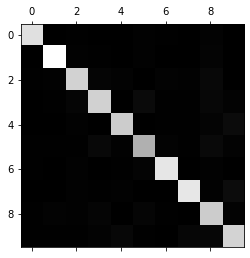

In [53]:
# confusion matrix image representation
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [54]:
# calculating absoute number of errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

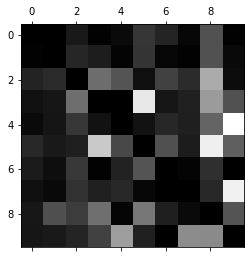

In [55]:
# plotting error rows
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification

In [56]:
# setting multilabel outputs
y_train_large = (mnist_train_y >= 7)
y_train_odd = (mnist_train_y % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [57]:
# creating KNeighbors classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(mnist_train_X, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
# predicting 'some digit', is it larger than 7? and odd?
knn_clf.predict(some_digit)

array([[False,  True]])

In [59]:
# KNN average F1 scroe across all labels
y_train_knn_pred = cross_val_predict(knn_clf, mnist_train_X, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9669431944477428

# Multioutput Classification

In [59]:
# creating some noise to build a system that will remove it, take noisy input and output a clean digit
noise = np.random.randint(0, 100, (len(mnist_train_X), 784))
X_train_mod = mnist_train_X + noise
noise = np.random.randint(0, 100, (len(mnist_test_X), 784))
X_test_mod = mnist_test_X + noise
y_train_mod = mnist_train_X
y_test_mod = mnist_test_X